# Self-Driving Car Engineer Nanodegree

### Deep Learning

### Project: Build a Traffic Sign Recognition Classifier

The neural networks in this project reference the `LeNet-5` implementation with some layers and parameters fine tuned. The best validation result is **97.8%** and the final test result is **95.4%**.

---
## Step 0: Load The Data

In [48]:
# Load pickled data
import pickle

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Mapping ClassID to traffic sign names
import csv

signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.

**THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# The shape of an traffic sign image
image_shape = train['features'].shape[1:]

# Number of unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). 

data index = 9989
label number = 0
Image label = Speed limit (20km/h)


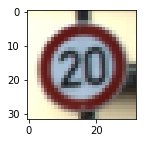

In [52]:
# Show an image selected randomly
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index_im = random.randint(0, len(X_train))
image = X_train[index_im].squeeze()

plt.figure(figsize = (2,2))
plt.imshow(image)
print('data index = ' + str(index_im))
print('label number = ' + str(y_train[index_im]))
print('Image label = ' + str(signs[y_train[index_im]]))

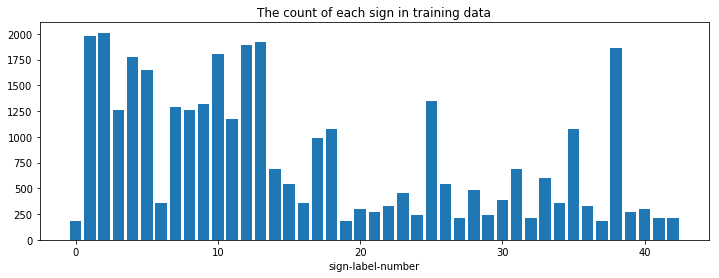

In [5]:
# plotting the count of each sign in training data
sign_count = []
for index in range(43):
    sign_count.append(list(y_train).count(index))

plt.figure(figsize=(12, 4))
plt.bar(range(len(sign_count)), sign_count)
plt.xlabel('sign-label-number')
plt.title('The count of each sign in training data')
plt.show()  

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. 

### Pre-process the Data Set (normalization, grayscale, etc.)

In [53]:
# Converting to grayscale
import cv2

def conv_gray(images):
    images_gray = []
    for image in images:
#         image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
        image_gray = np.array(cv2.cvtColor(image,cv2.COLOR_RGB2GRAY))
        image_gray.resize(32, 32, 1)
        images_gray.append(image_gray)
    return np.array(images_gray)

X_train = conv_gray(X_train)
X_valid = conv_gray(X_valid)
X_test = conv_gray(X_test)

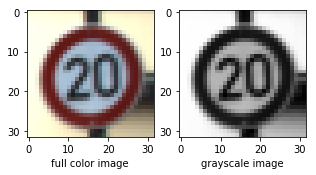

In [54]:
# Plotting the gray image
image_gray = X_train[index_im].squeeze()
plt.figure(figsize = (5,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
plt.sca(ax1)
plt.xlabel('full color image')
plt.imshow(image)
plt.sca(ax2)
plt.xlabel('grayscale image')
plt.imshow(image_gray, cmap='gray')
plt.show()

In [8]:
# Image normalize
X_train = (X_train / 255.0)
X_valid = (X_valid / 255.0)
X_test = (X_test / 255.0)

In [9]:
#Shuffle the training data.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [10]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x48. Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(48))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x96. Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(96))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 3x3x172. Pooling. Input = 3x3x172. Output = 2x2x172.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(172))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b    
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    # Flatten. Input = 2x2x172. Output = 688.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 688. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(688, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 5: Fully Connected. Input = 240. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [12]:
#Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [13]:
#Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [14]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} : ".format(i+1) + "Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 : Validation Accuracy = 0.850
EPOCH 2 : Validation Accuracy = 0.900
EPOCH 3 : Validation Accuracy = 0.942
EPOCH 4 : Validation Accuracy = 0.911
EPOCH 5 : Validation Accuracy = 0.934
EPOCH 6 : Validation Accuracy = 0.942
EPOCH 7 : Validation Accuracy = 0.932
EPOCH 8 : Validation Accuracy = 0.939
EPOCH 9 : Validation Accuracy = 0.911
EPOCH 10 : Validation Accuracy = 0.951
EPOCH 11 : Validation Accuracy = 0.932
EPOCH 12 : Validation Accuracy = 0.944
EPOCH 13 : Validation Accuracy = 0.955
EPOCH 14 : Validation Accuracy = 0.958
EPOCH 15 : Validation Accuracy = 0.957
EPOCH 16 : Validation Accuracy = 0.965
EPOCH 17 : Validation Accuracy = 0.973
EPOCH 18 : Validation Accuracy = 0.977
EPOCH 19 : Validation Accuracy = 0.976
EPOCH 20 : Validation Accuracy = 0.976
EPOCH 21 : Validation Accuracy = 0.975
EPOCH 22 : Validation Accuracy = 0.976
EPOCH 23 : Validation Accuracy = 0.976
EPOCH 24 : Validation Accuracy = 0.976
EPOCH 25 : Validation Accuracy = 0.976
EPOCH 26 : Validation

In [16]:
#Evaluate the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.954


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [18]:
# Load 5 new test images
import os

new_test_images = []
path = '../traffic-signs-data/new_test_images/'
print('The new test images are :')
for image in os.listdir(path):
    print(image)
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_test_images.append(img)

The new test images are :
40.jpg
20.jpg
4.jpg
18.jpg
14.jpg


In [19]:
# The new test images' labels
new_test_signs = [40, 20, 4, 18, 14]

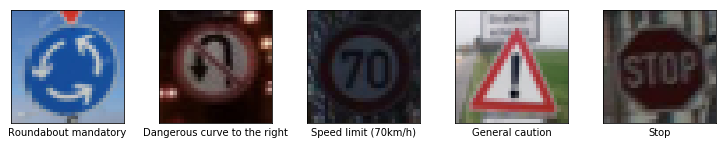

In [20]:
# Plotting the new test images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_test_images[i])
    plt.xlabel(signs[new_test_signs[i]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()

### Predict the Sign Type for Each Image

In [21]:
# Pre-process the new test images
new_test_gray = conv_gray(new_test_images)
new_test_norm = new_test_gray / 255.0

INFO:tensorflow:Restoring parameters from ./lenet
[40, 20, 4, 18, 14] <== Actural Sign
[40, 28, 4, 18, 14] <== Predict Sign


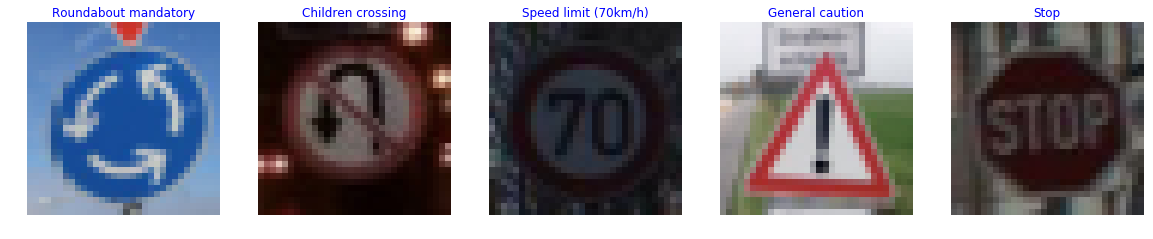

In [22]:
# Predict the Sign Type for Each Image
def new_test(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, y: 1.0})
    return pred_sign
    
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    signs_classes=new_test(new_test_norm, sess)

print(str(new_test_signs) + ' <== Actural Sign')
print(str(list(signs_classes)) + ' <== Predict Sign')

plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(new_test_images[i]) 
    plt.title(signs[signs_classes[i]], color = 'blue')
    plt.axis('off')
plt.show()

### Analyze Performance

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(new_test_norm, new_test_signs)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [24]:
def new_test_top(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, y: 1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    signs_top_5=new_test_top(new_test_norm, sess)
    
print(signs_top_5)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  1.00000000e+00,   7.12827607e-15,   1.36144686e-15,
          1.47024881e-18,   5.17890699e-19],
       [  8.50758374e-01,   1.49215594e-01,   1.66553946e-05,
          5.68079167e-06,   2.74124159e-06],
       [  1.00000000e+00,   4.68496444e-13,   2.81964118e-15,
          2.64503005e-16,   1.30985382e-17],
       [  1.00000000e+00,   4.83269661e-31,   4.36940983e-31,
          2.21758217e-37,   0.00000000e+00],
       [  1.00000000e+00,   5.50361111e-11,   1.72059936e-12,
          1.07394482e-15,   2.68093975e-16]], dtype=float32), indices=array([[40,  1, 11, 21, 12],
       [28, 36, 20,  3, 29],
       [ 4,  1,  8,  7,  0],
       [18, 37, 27, 26,  0],
       [14,  8,  4, 17, 39]], dtype=int32))


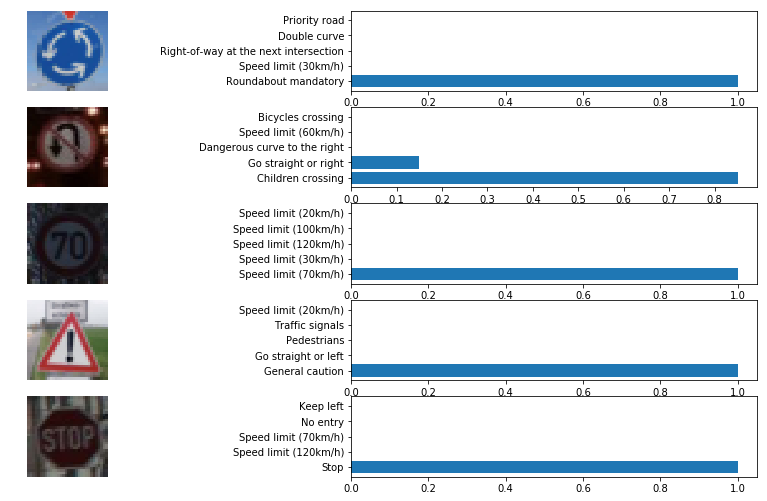

In [25]:
plt.figure(figsize=(16, 21))
for i in range(5):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(new_test_images[i]) 
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signs[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()